# Homework 1

## Behavior Cloning

### #1 Implementation
See `behavior_cloning.py`. To run 
```
python behavior_cloning.py Hopper-v2
```

### #2 Result

We trained policy using behavior-cloning (BC) on all the tasks. Table 1 demonstrates that behavior cloning can work very well on the task `Hopper-v2`. However, table 2 shows that the same algorithm failed on a more complex task `Humanoid-v2`. 

```
------------------------------------------
| policy            | mean rewards | std |
------------------------------------------
| behavior-cloning  | 3650         | 123 |
| expert            | 3778         | 4   |
------------------------------------------
```
***Table 1*** Comparison of the behavior-cloing model and the expert policy on the Hopper-v2 task. 


```
------------------------------------------
| policy            | mean rewards | std |
------------------------------------------
| behavior-cloning  | 811          | 266 |
| expert            | 10415        | 64  |
------------------------------------------

```
***Table 2*** Comparison of the behavior-cloing model and the expert policy on the Humanoid-v2 task. 

In the above tasks, we train the BC policies using the same neural network structure and the same training procedure:
- Neural network Three hidden layers with dimension (64, 128, 64).
- L2 regularization constant 1e-6.
- L2 loss.
- adam optimizer with constant learning rate 5e-4.
- batch size 128. 
- 50000 batches.

The training data are 10000 samples (10 rollouts) for all tasks. 


### #3 Hyperparameter tuning

## DAgger

### #1 Implementation

See `dagger.py` for implementation. To run:
```
python dagger.py Humanoid-v2
```

### #2 Result

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
reward = np.load('result/Humanoid-v2_dagger_learning_curve.npy').reshape(15, 15)
r_mean = reward.mean(axis=1)
r_std = reward.std(axis=1)

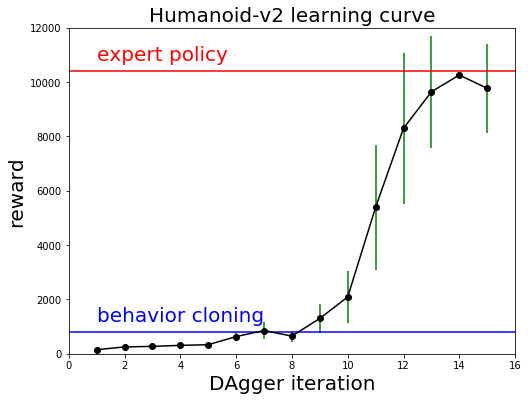

In [42]:
plt.figure(figsize=[8, 6])
plt.errorbar(np.arange(len(r_mean)) + 1, r_mean, yerr=r_std, fmt='-ko', ecolor='g', capthick=1)
plt.title('Humanoid-v2 learning curve', fontsize=20)
plt.xlabel('DAgger iteration', fontsize=20)
plt.ylabel('reward', fontsize=20)
plt.xlim([0, 16])
plt.ylim([0, 12000])
plt.axhline(10415, color='r')
plt.axhline(811, color='b')
plt.text(1, 10800, 'expert policy', color='r', fontsize=20)
plt.text(1, 1200, 'behavior cloning', color='b', fontsize=20)
plt.show()
# plt.savefig('result/dagger_humanoid_learning_curve.png', dpi=100)